In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 1000)

In [2]:
# Data sourced from https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter/data

currentApplicationData = pd.read_csv('data/application_data.csv')
previousApplicationData = pd.read_csv('data/previous_application.csv')
columnDescription = pd.read_csv('data/columns_description.csv')

df = pd.merge(currentApplicationData, previousApplicationData, on='SK_ID_CURR', suffixes=('', '_PREV'))

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PREV,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / a

## Exploratory Data Analysis

In [3]:
columnDescription

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,HOUR_APPR_PROCESS_START_PREV,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,476495.000000,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,616842.000000,1.411880e+06,1.171859e+06,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,736160.000000,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+0

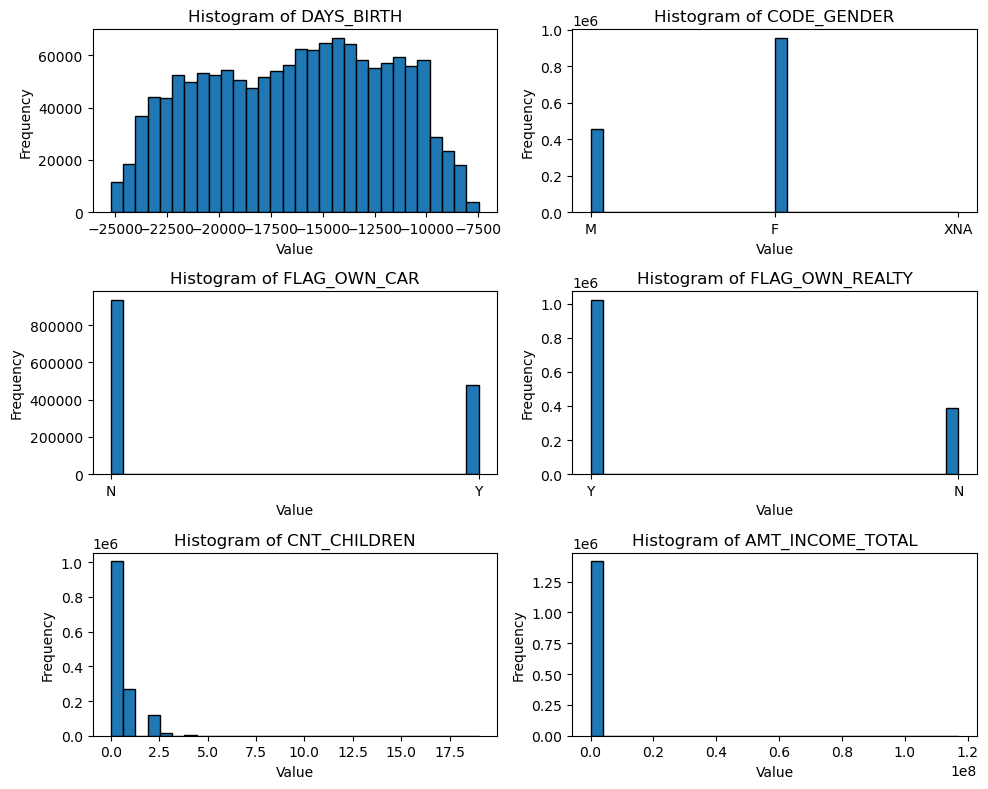

In [6]:
df_target = df[['TARGET']]
df_plots = df[[
    "DAYS_BIRTH",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
]]
fig, axs = plt.subplots(round(len(df_plots.columns)/2), 2, figsize=(10, 8))
axs = axs.flatten()
if len(df_plots.columns) < len(axs):
    fig.delaxes(axs[-1])

for i, column in enumerate(df_plots.columns):
    axs[i].hist(df_plots[column], bins=30, edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

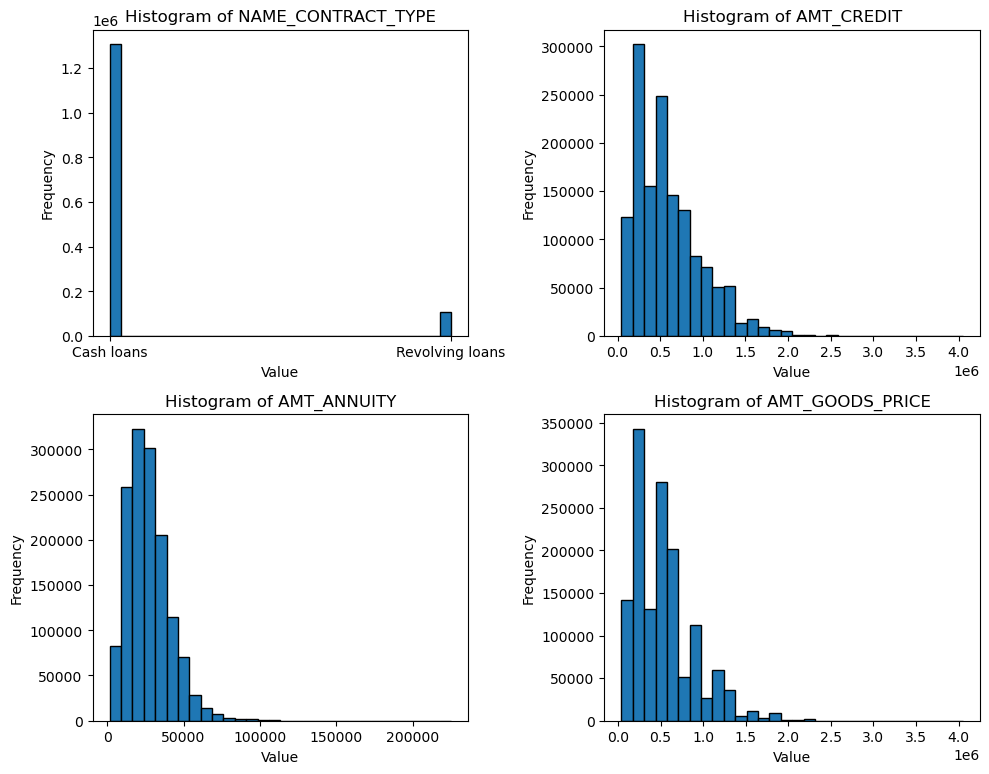

In [7]:
df_plots = df[[
    "NAME_CONTRACT_TYPE",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
]]
fig, axs = plt.subplots(round(len(df_plots.columns)/2), 2, figsize=(10, 8))
axs = axs.flatten()
if len(df_plots.columns) < len(axs):
    fig.delaxes(axs[-1])

for i, column in enumerate(df_plots.columns):
    axs[i].hist(df_plots[column], bins=30, edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'TARGET'}>]], dtype=object)

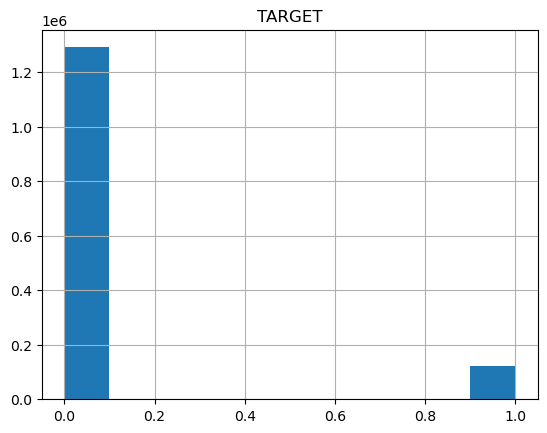

In [8]:
df_target.hist()

# 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
# 0 - all other cases

## Data Cleaning

In [9]:
missing_features = df.isnull().mean() * 100
missing_features

SK_ID_CURR                          0.000000
TARGET                              0.000000
NAME_CONTRACT_TYPE                  0.000000
CODE_GENDER                         0.000000
FLAG_OWN_CAR                        0.000000
FLAG_OWN_REALTY                     0.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL                    0.000000
AMT_CREDIT                          0.000000
AMT_ANNUITY                         0.006578
AMT_GOODS_PRICE                     0.085449
NAME_TYPE_SUITE                     0.249416
NAME_INCOME_TYPE                    0.000000
NAME_EDUCATION_TYPE                 0.000000
NAME_FAMILY_STATUS                  0.000000
NAME_HOUSING_TYPE                   0.000000
REGION_POPULATION_RELATIVE          0.000000
DAYS_BIRTH                          0.000000
DAYS_EMPLOYED                       0.000000
DAYS_REGISTRATION                   0.000000
DAYS_ID_PUBLISH                     0.000000
OWN_CAR_AGE                        66.294499
FLAG_MOBIL

In [10]:
# Dropping all columns that are missing more tham 50% of data
df_clean = df.drop(columns=missing_features[missing_features > 50].index)

# Drop gender, ids from model
df_clean = df_clean.drop(columns=["CODE_GENDER", "SK_ID_PREV", "SK_ID_CURR"])

# Drop null values
df_clean = df_clean.dropna(axis=1)

print(str(df_clean.shape[1] / df.shape[1]) + "% of data remaining")
df_clean


0.46835443037974683% of data remaining


,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_PREV,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,1,Cash loans,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Consumer loans,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal
1,0,Cash loans,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cash loans,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
2,0,Cash loans,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Consumer loans,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle
3,0,Cash loans,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Consumer loans,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle
4,0,Revolving loans,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Consumer loans,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,0,Cash loans,N,N,0,157500.0,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,1,1,1,1,1,0,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cash loans,229500.0,THURSDAY,12,Y,1,XNA,Approved,-648,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
1413697,0,Cash loans,N,N,0,157500.0,

In [11]:
df_clean.columns.tolist()

['TARGET',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUM

## Feature Engineering

In [12]:
# Credit Utilization Ratio - Amount of credit customer is using / total amount of credit available to the customer

# Debt to Income - Clients total debt / total income

# Change in Employment Status - 

# Credit Score Trend - Trend of credit scores?

# Loan to Value Ration - Loan amount / value of asset

# Interest Rate Spread - Spread between Rate_Interest_Primary and Rate_Interest_Privildged

# Financial Stability - 

# Payment Shock

# Interaction Terms

# Historical Default Rate

# Social Stability Index

# Loan Purpose Effectiveness

# Seasonality of Loan Applications

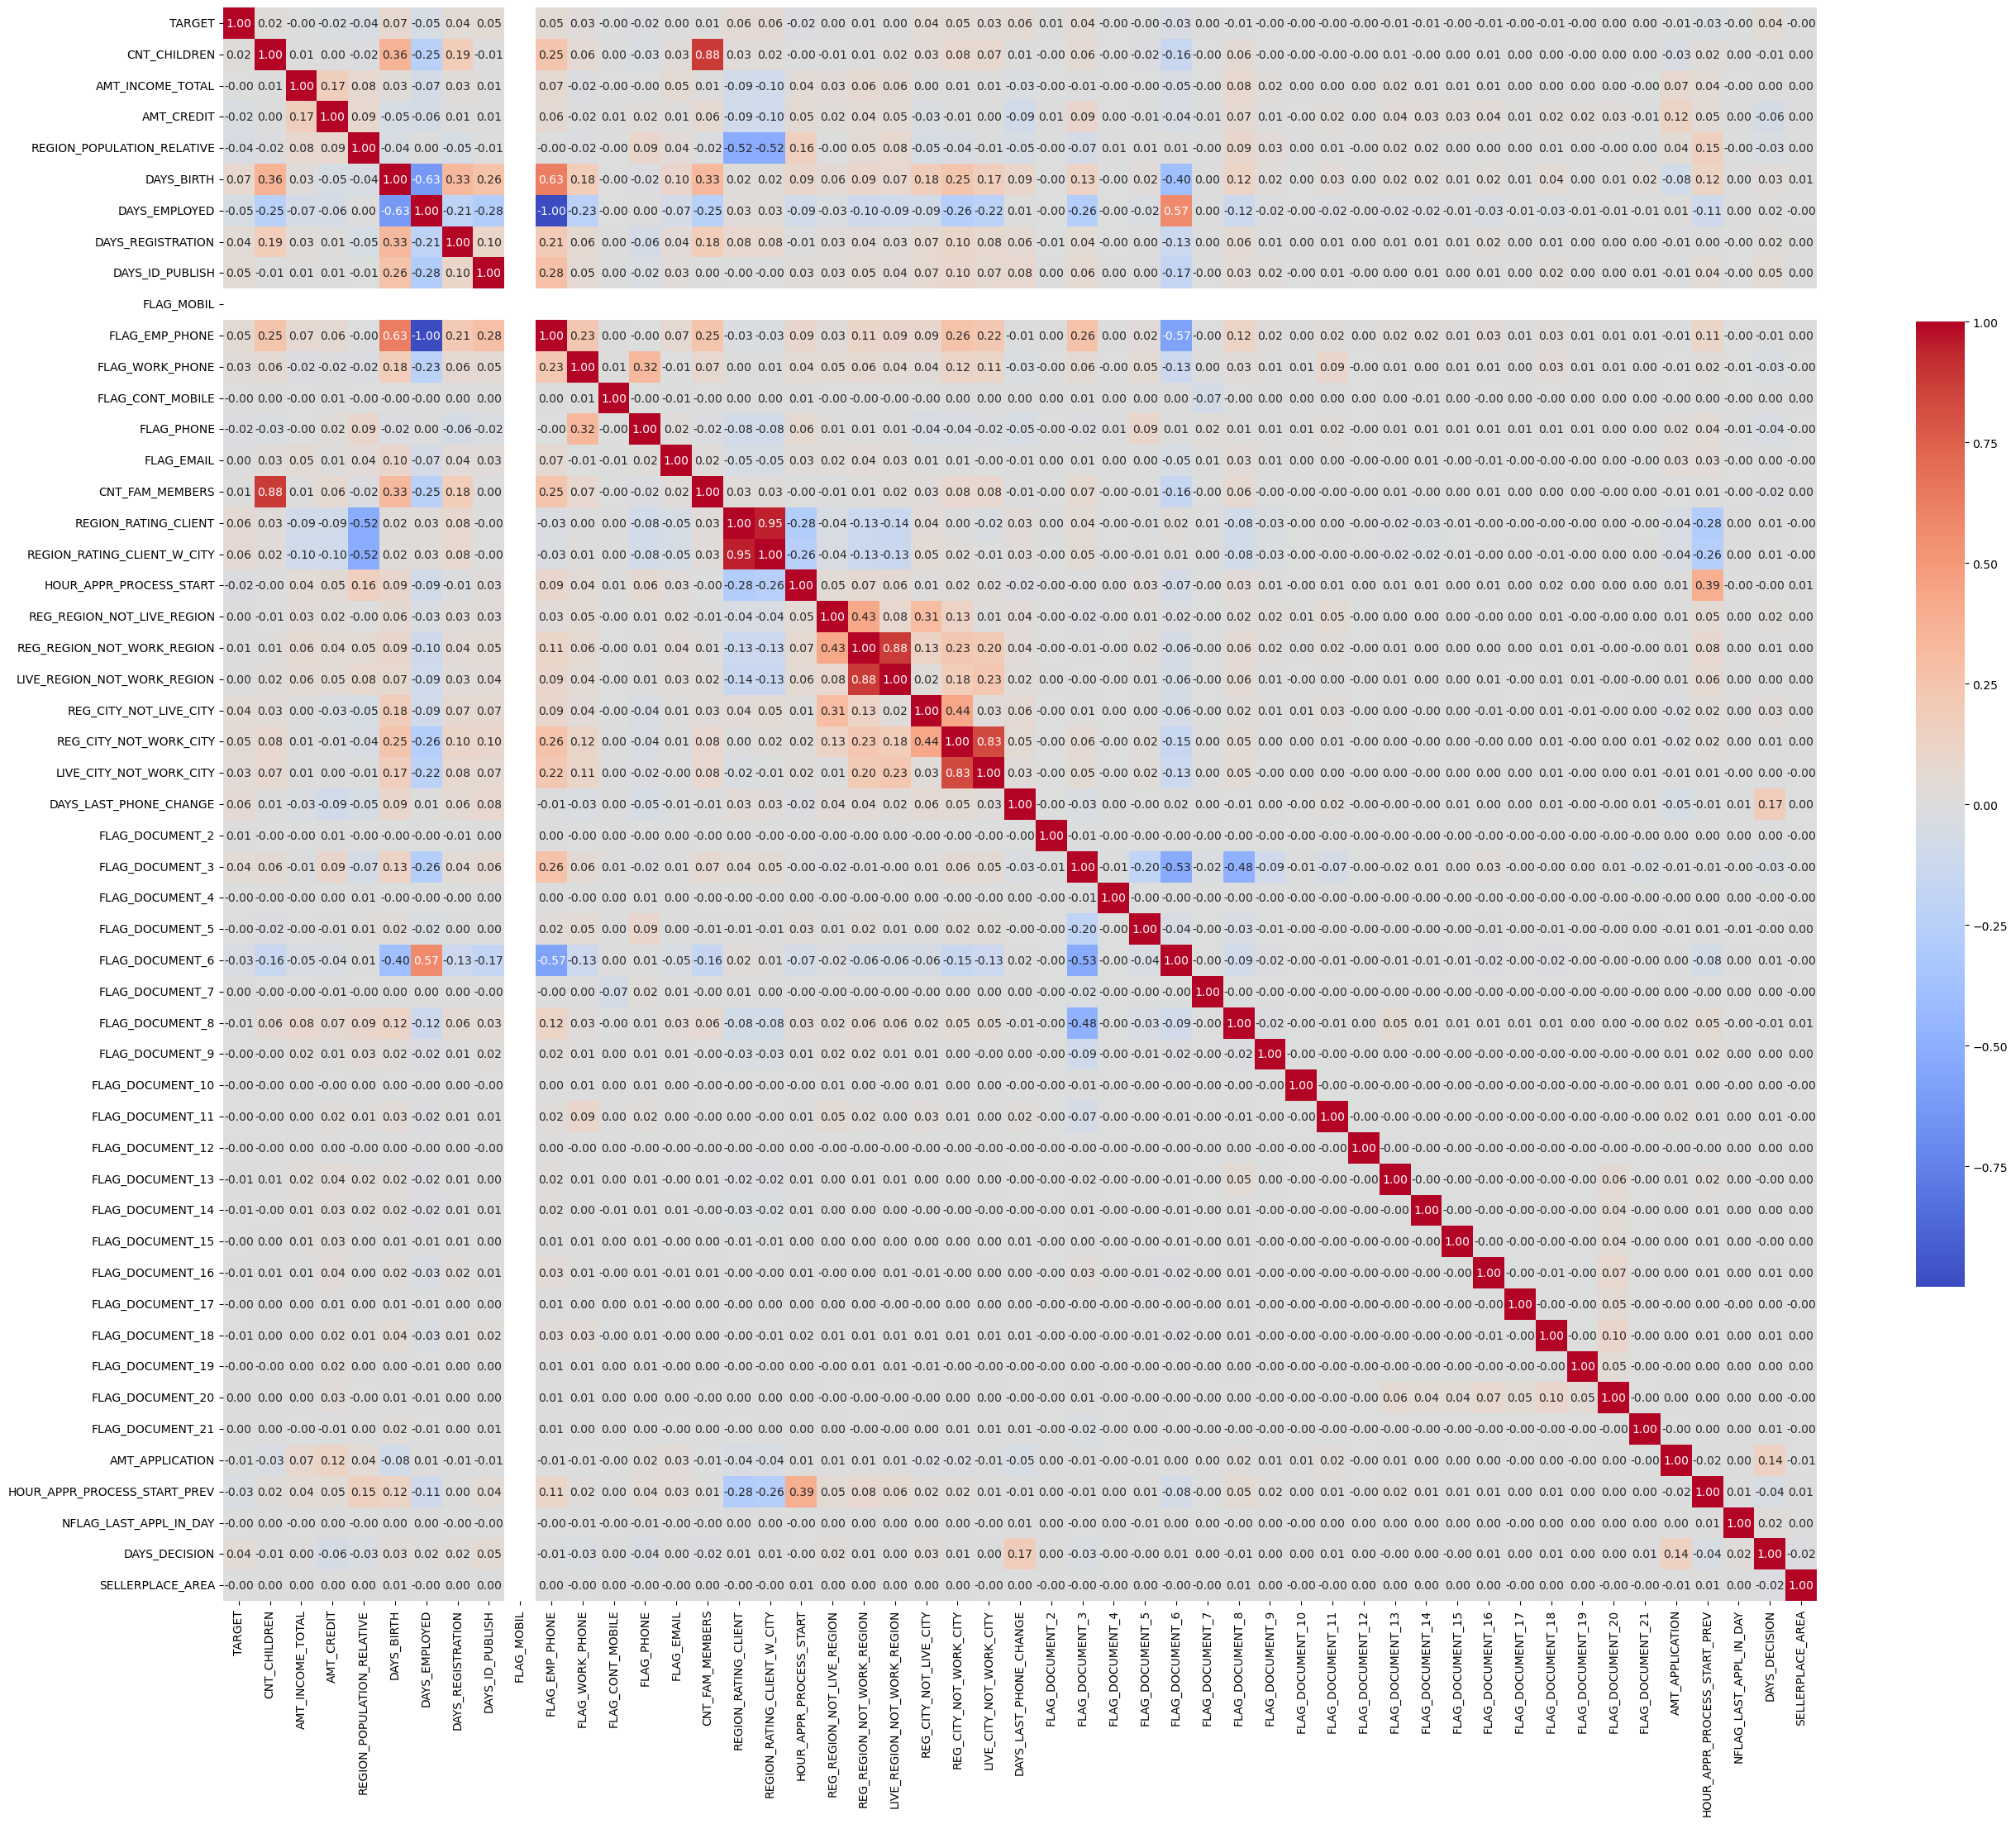

In [13]:
correlation_matrix = df_clean.select_dtypes(include=['int64', 'float64']).corr()
f, ax = plt.subplots(figsize=(27, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm', 
            cbar_kws={"shrink": .5}, ax=ax)
plt.tight_layout()
plt.show()

## Models


In [14]:
df_clean = df_clean.sample(frac=0.25, random_state=42)

X = df_clean.drop('TARGET', axis=1)
y = df_clean['TARGET']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Baseline Model

<Figure size 1000x800 with 0 Axes>

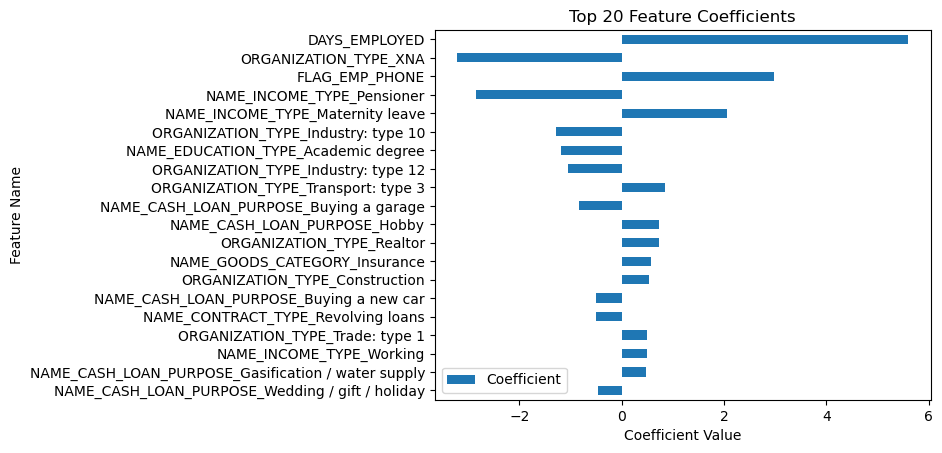

Accuracy 0.914352812464632, Precision 0.6111111111111112, Recall 0.0012107870115575124, F1 0.0024167856750521807
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     96943
           1       0.61      0.00      0.00      9085

    accuracy                           0.91    106028
   macro avg       0.76      0.50      0.48    106028
weighted avg       0.89      0.91      0.87    106028



In [15]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias=False))
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model_pipeline.fit(X_train, y_train)

feature_names = list(model_pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['poly'].get_feature_names_out(input_features=numerical_cols)) + \
                list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_cols))

# Extracting coefficients
coefficients = model_pipeline.named_steps['classifier'].coef_[0]

# Mapping coefficients to feature names
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient']).sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 8))
feature_importance.head(20).plot(kind='barh')
plt.title('Top 20 Feature Coefficients')
plt.gca().invert_yaxis() 
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()

# Compute accuracy, precision, recall
y_pred = cross_val_predict(model_pipeline, X_test, y_test, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy {accuracy}, Precision {precision}, Recall {recall}, F1 {f1}')
print(classification_report(y_test, y_pred))

## PCA

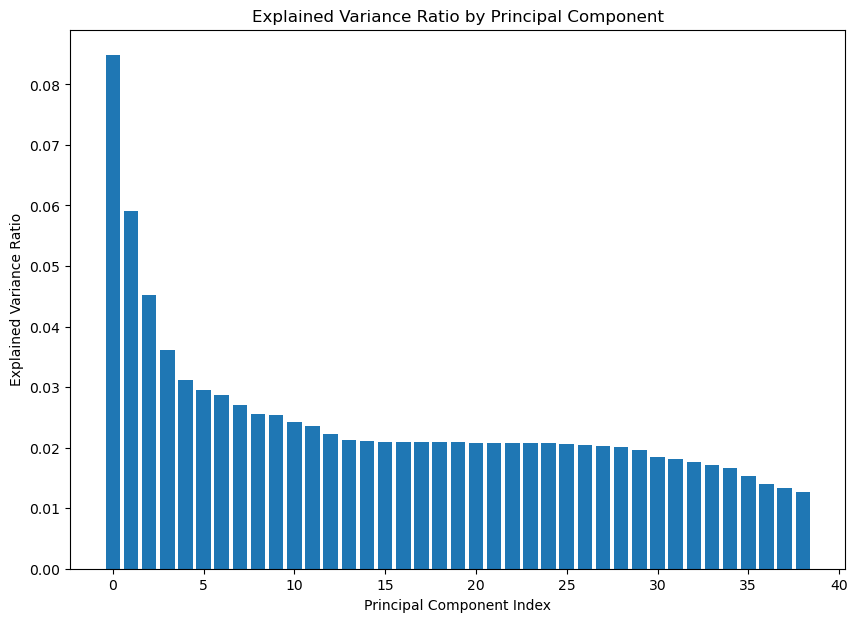

Accuracy: 0.9143245180518353, Precision: 0.5384615384615384, Recall: 0.0007705008255365987, F1: 0.0015387997362057593
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     96943
           1       0.54      0.00      0.00      9085

    accuracy                           0.91    106028
   macro avg       0.73      0.50      0.48    106028
weighted avg       0.88      0.91      0.87    106028



In [16]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)) # Keep components that explain 95% of variance
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fitting the model
model_pipeline.fit(X_train, y_train)


# Getting explained variance ratios for the numerical features
explained_variance = model_pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['pca'].explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 7))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# To evaluate model performance (accuracy, precision, recall), use cross_val_predict as before
y_pred = cross_val_predict(model_pipeline, X_test, y_test, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}')
print(classification_report(y_test, y_pred))

<Figure size 1000x800 with 0 Axes>

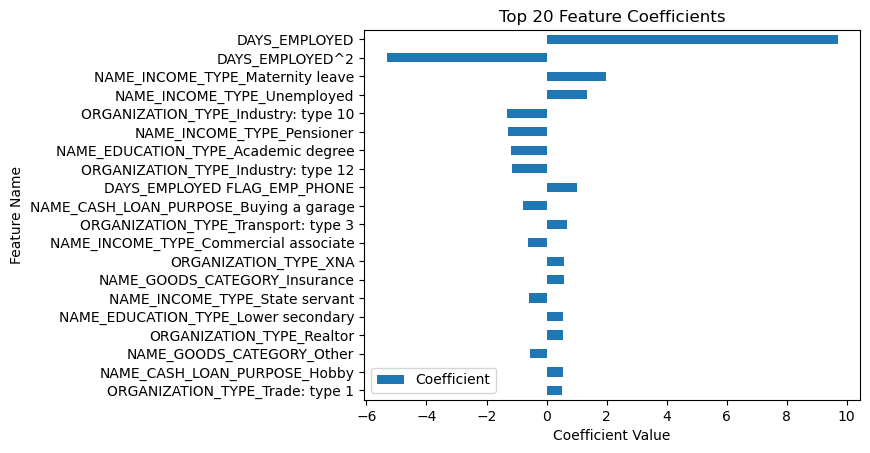

Accuracy 0.9143245180518353, Precision 1.0, Recall 0.0001100715465052284, F1 0.00022011886418666079
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     96943
           1       1.00      0.00      0.00      9085

    accuracy                           0.91    106028
   macro avg       0.96      0.50      0.48    106028
weighted avg       0.92      0.91      0.87    106028



In [17]:
df_important = df_clean[[
    'DAYS_EMPLOYED',
    'FLAG_EMP_PHONE',
    'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_CASH_LOAN_PURPOSE',
    'NAME_GOODS_CATEGORY',
    'CHANNEL_TYPE',
    'NAME_CONTRACT_TYPE',
    'TARGET'
]]

X = df_important.drop('TARGET', axis=1)
y = df_important['TARGET']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model_pipeline.fit(X_train, y_train)

feature_names = list(model_pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['poly'].get_feature_names_out(input_features=numerical_cols)) + \
                list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_cols))

# Extracting coefficients
coefficients = model_pipeline.named_steps['classifier'].coef_[0]

# Mapping coefficients to feature names
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient']).sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 8))
feature_importance.head(20).plot(kind='barh')
plt.title('Top 20 Feature Coefficients')
plt.gca().invert_yaxis() 
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()

# Compute accuracy, precision, recall
y_pred = cross_val_predict(model_pipeline, X_test, y_test, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy {accuracy}, Precision {precision}, Recall {recall}, F1 {f1}')
print(classification_report(y_test, y_pred))

In [18]:
df_important = df_clean[[
    'DAYS_EMPLOYED',
    'FLAG_EMP_PHONE',
    'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_CASH_LOAN_PURPOSE',
    'NAME_GOODS_CATEGORY',
    'CHANNEL_TYPE',
    'NAME_CONTRACT_TYPE',
    'TARGET'
]]

X = df_important.drop('TARGET', axis=1)
y = df_important['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Random Forest 
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=10))
])
random_forest_pipeline.fit(X_train, y_train)
y_pred = cross_val_predict(random_forest_pipeline, X_test, y_test, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy {accuracy}, Precision {precision}, Recall {recall}, F1 {f1}')
print(classification_report(y_test, y_pred))

# Support Vector Machine 
# svm_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', SVC(probability=True))
# ])
# svm_pipeline.fit(X_train, y_train)
# svm_scores = cross_val_score(svm_pipeline, X_test, y_test, cv=5)
# print(f"Support Vector Machine - CV Scores: {svm_scores}, Average Score: {np.mean(svm_scores)}")
# print(f"Classification Report for Support Vector Machine:\n{classification_report(y_test, svm_pipeline.predict(X_test))}\n")

Accuracy 0.9033882719105892, Precision 0.28283957518166575, Recall 0.08360872438863186, F1 0.12906517025889555
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     64633
           1       0.28      0.08      0.13      6052

    accuracy                           0.90     70685
   macro avg       0.60      0.53      0.54     70685
weighted avg       0.86      0.90      0.88     70685



In [19]:
df_important = df_clean[[
    'DAYS_EMPLOYED',
    'FLAG_EMP_PHONE',
    'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_CASH_LOAN_PURPOSE',
    'NAME_GOODS_CATEGORY',
    'CHANNEL_TYPE',
    'NAME_CONTRACT_TYPE',
    'TARGET'
]]

X = df_important.drop('TARGET', axis=1)
y = df_important['TARGET']

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# K-Nearest Neighbors Classifier Pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Naive Bayes Classifier Pipeline
naive_bayes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Fit KNN
knn_pipeline.fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_pipeline, X_test, y_test, cv=5)

# Fit Naive Bayes
naive_bayes_pipeline.fit(X_train, y_train)
y_pred_nb = cross_val_predict(naive_bayes_pipeline, X_test, y_test, cv=5)

# Evaluate KNN
print("K-Nearest Neighbors Classifier:")
y_pred = cross_val_predict(knn_pipeline, X_test, y_test, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy {accuracy}, Precision {precision}, Recall {recall}, F1 {f1}')
print(classification_report(y_test, y_pred))

# Evaluate Naive Bayes
print("Naive Bayes Classifier:")
y_pred = cross_val_predict(naive_bayes_pipeline, X_test, y_test, cv=5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy {accuracy}, Precision {precision}, Recall {recall}, F1 {f1}')
print(classification_report(y_test, y_pred))

K-Nearest Neighbors Classifier:
Accuracy 0.9073919502015987, Precision 0.1724137931034483, Recall 0.021480502313284865, F1 0.03820158683514546
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     64633
           1       0.17      0.02      0.04      6052

    accuracy                           0.91     70685
   macro avg       0.54      0.51      0.49     70685
weighted avg       0.85      0.91      0.87     70685

Naive Bayes Classifier:
Accuracy 0.1228832142604513, Precision 0.08618470687436204, Recall 0.9626569729015202, F1 0.15820559123433492
              precision    recall  f1-score   support

           0       0.93      0.04      0.08     64633
           1       0.09      0.96      0.16      6052

    accuracy                           0.12     70685
   macro avg       0.51      0.50      0.12     70685
weighted avg       0.85      0.12      0.09     70685



In [21]:
scores = pd.DataFrame({
    "models": ["Logistic Regression + Poly 2", "Random Forrest + Poly 2", "KNN + Poly 2", "Naive Bayes + Poly 2"],
    "accuracy": [0.9143245180518353, 0.9024262573388979, 0.9073919502015987, 0.1228832142604513]
})

Logistic regression performing the best, Naive Bayes performing the worst

Lets tune logistic regression model

In [26]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)) 
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic_regression', LogisticRegression(max_iter=1000)) 
])

param_grid = {
    'logistic_regression__C': np.logspace(-4, 4, 2),  # Regularization strength
    'logistic_regression__penalty': ['l1', 'l2'],     # Type of regularization
    'logistic_regression__solver': ['liblinear']      # Solver that supports both l1 and l2 penalties
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
best_model = grid_search.best_estimator_
logistic_regression_model = best_model.named_steps['logistic_regression']
preprocessor = best_model.named_steps['preprocessor']
num_feature_names = preprocessor.named_transformers_['num'].named_steps['poly'].get_feature_names_out(input_features=numerical_cols)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)

all_feature_names = np.array(list(num_feature_names) + list(cat_feature_names))
coefficients = logistic_regression_model.coef_[0]
features_coefficients = sorted(zip(all_feature_names, coefficients), key=lambda x: np.abs(x[1]), reverse=True)
top_features, top_coefficients = zip(*features_coefficients[:10])

# Calculate accuracy, precision, and recall
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred)
print(f'Accuracy {accuracy}, Precision {precision}, Recall {recall}, F1 {f1}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'logistic_regression__C': 0.0001, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
Best accuracy found:  0.913553087642357
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     64633
           1       0.00      0.00      0.00      6052

    accuracy                           0.91     70685
   macro avg       0.46      0.50      0.48     70685
weighted avg       0.84      0.91      0.87     70685

Accuracy 0.9143807031194737, Precision 0.0, Recall 0.0, F1 0.0
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     64633
           1       0.00      0.00      0.00      6052

    accuracy                           0.91     70685
   macro avg       0.46      0.50      0.48     70685
weighted avg       0.84      0.91      0.87     70685

